In [2]:
! pip install imutils

import os
import math
import cv2
import dlib
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=b8a56cdf5b6fb5f4fda5686448113e759d6ce11b74c403fea2c71e1dacb8f574
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [5]:
predictor81 = dlib.shape_predictor('../input/shape-predictor81/shape_predictor_81_face_landmarks.dat')
    
def load_images_from_folder(folder):
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames


# Function to perform facial landmark detection on the whole face
def facial_landmarks(image):    
    global predictor81
    
    # Use dlib 81 to predict landmarks points coordinates
    detector = dlib.get_frontal_face_detector()
    
    # Grayscale image
    try:
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    except:
        grayscale_image = image
    
    # array of rectangles surrounding faces detected
    rectangles = detector(grayscale_image, 1)

    # If at least one face is detected, find its landmarks
    if len(rectangles) > 0:
        # Get 81 landmark points
        faceLandmarks = predictor81(grayscale_image, rectangles[0])
        faceLandmarks = face_utils.shape_to_np(faceLandmarks)
        return faceLandmarks
    
    # No faces found
    else:
        return None

    
# Function to rotate image to align the face
def align_face(image, eyePoints):
    # Get left eye & right eye coordinates
    leftEyeX,leftEyeY = eyePoints[0]
    rightEyeX, rightEyeY = eyePoints[1]

    # Calculate angle of rotation & origin point
    angle = math.atan( (leftEyeY - rightEyeY) / (leftEyeX - rightEyeX) ) * (180/math.pi)
    origin_point = tuple(np.array(image.shape[1::-1]) / 2)

    # Rotate using rotation matrix
    rot_mat = cv2.getRotationMatrix2D(origin_point, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result


# Function to draw points on facial features
def drawPoints(image, points, pointColor=(255,255,255), lineColor=(255,255,255), pointThickness=5, lineThickness=1):
    for i in points:
        x,y = i
        image = cv2.circle(image, (x,y), radius=0, color=pointColor, thickness=pointThickness)
    return image


def main():
    # Capture all images in current folder & their names
    images, filesnames = load_images_from_folder('../input/facesall/faces')
    
    # Detect & Visualize each image
    for originalImage, filename in zip(images, filesnames):
        originalImage = cv2.cvtColor(originalImage,cv2.COLOR_BGR2RGB)
        
        landmarks = facial_landmarks(originalImage)
        
        if landmarks is not None:
            
            # Draw landmarks
            image = drawPoints(originalImage, landmarks)
            
        else:
            print(f"{filename} is not good")

In [6]:
main()

sukuna.jpg is not good


In [10]:
import os
import cv2
import pandas as pd

def save_landmarks_to_csv(landmarks, filename):
    df = pd.DataFrame(landmarks, columns=['X', 'Y', 'Xn', 'Yn'])
    df.to_csv(filename, index_label='Landmark_ID')

def main():
    # Capture all images in the current folder & their names
    frames_folder = '/kaggle/input/editedvideoframes/frames'
    filenames = sorted(os.listdir(frames_folder))
    
    # Iterate over images
    for idx in range(len(filenames) - 1):  # Iterate till the second last frame
        originalImage = cv2.cvtColor(cv2.imread(os.path.join(frames_folder, filenames[idx])), cv2.COLOR_BGR2RGB)
        nextImage = cv2.cvtColor(cv2.imread(os.path.join(frames_folder, filenames[idx + 1])), cv2.COLOR_BGR2RGB)
        
        # Detect landmarks for current and next frame
        landmarks_current = facial_landmarks(originalImage)
        landmarks_next = facial_landmarks(nextImage)
        
        if landmarks_current is not None and landmarks_next is not None:
            # Combine current and next frame landmarks into one list
            combined_landmarks = []
            for landmark_current, landmark_next in zip(landmarks_current, landmarks_next):
                combined_landmarks.append(landmark_current[0])
                combined_landmarks.append(landmark_current[1])
                combined_landmarks.append(landmark_next[0])
                combined_landmarks.append(landmark_next[1])
            
            # Reshape combined landmarks into the correct shape
            combined_landmarks = [combined_landmarks[i:i+4] for i in range(0, len(combined_landmarks), 4)]
            
            # Save combined landmarks to CSV
            csv_filename = f'/kaggle/working/landmarks_frames_{filenames[idx]}_{filenames[idx+1]}.csv'
            save_landmarks_to_csv(combined_landmarks, csv_filename)
            print(f"Landmarks for {filenames[idx]} and {filenames[idx+1]} saved to {csv_filename}")

if __name__ == "__main__":
    main()

Landmarks for frame_0001.jpg and frame_0002.jpg saved to /kaggle/working/landmarks_frames_frame_0001.jpg_frame_0002.jpg.csv
Landmarks for frame_0002.jpg and frame_0003.jpg saved to /kaggle/working/landmarks_frames_frame_0002.jpg_frame_0003.jpg.csv
Landmarks for frame_0003.jpg and frame_0004.jpg saved to /kaggle/working/landmarks_frames_frame_0003.jpg_frame_0004.jpg.csv
Landmarks for frame_0004.jpg and frame_0005.jpg saved to /kaggle/working/landmarks_frames_frame_0004.jpg_frame_0005.jpg.csv
Landmarks for frame_0005.jpg and frame_0006.jpg saved to /kaggle/working/landmarks_frames_frame_0005.jpg_frame_0006.jpg.csv
Landmarks for frame_0006.jpg and frame_0007.jpg saved to /kaggle/working/landmarks_frames_frame_0006.jpg_frame_0007.jpg.csv
Landmarks for frame_0007.jpg and frame_0008.jpg saved to /kaggle/working/landmarks_frames_frame_0007.jpg_frame_0008.jpg.csv
Landmarks for frame_0008.jpg and frame_0009.jpg saved to /kaggle/working/landmarks_frames_frame_0008.jpg_frame_0009.jpg.csv
Landmark

In [5]:
import pandas as pd


def main():
    # Capture all images in current folder & their names
    images, filenames = load_images_from_folder('/kaggle/input/facesall/faces')
    
    for idx, originalImage in enumerate(images):
        originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
        
        # Detect landmarks
        landmarks = facial_landmarks(originalImage)
        
        if landmarks is not None:
            # Save landmarks to CSV
            csv_filename = f'/kaggle/working/landmarks_image_{idx}.csv'
            save_landmarks_to_csv(landmarks, csv_filename)
            print(f"Landmarks for {filenames[idx]} saved to {csv_filename}")

if __name__ == "__main__":
    main()

Landmarks for 21070126076.jpg saved to /kaggle/working/landmarks_image_0.csv
Landmarks for yuta.png saved to /kaggle/working/landmarks_image_1.csv
Landmarks for SanskarJadhavpic.jpeg saved to /kaggle/working/landmarks_image_2.csv
Landmarks for Sanskar_Jadhav.jpg saved to /kaggle/working/landmarks_image_3.csv
Landmarks for testface2.jpg saved to /kaggle/working/landmarks_image_4.csv
Landmarks for me_old.jpg saved to /kaggle/working/landmarks_image_5.csv
Landmarks for testface.jpeg saved to /kaggle/working/landmarks_image_6.csv


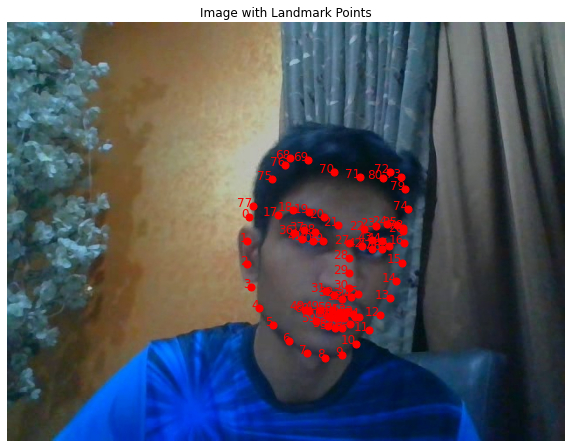

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

def plot_landmarks_on_image(image, landmarks_csv):
    # Load landmarks from CSV
    landmarks_df = pd.read_csv(landmarks_csv)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Plot each landmark point with its ID label
    for index, row in landmarks_df.iterrows():
        x, y = row['X'], row['Y']
        plt.scatter(x, y, color='red', s=50)
        plt.text(x, y, str(index), color='red', fontsize=12, ha='right')
    
    plt.axis('off')
    plt.title('Image with Landmark Points')
    plt.show()

# Example usage:
image_path = '/kaggle/input/editedvideoframes/frames/frame_0059.jpg'  # Path to your image
landmarks_csv = '/kaggle/working/landmarks_frames_frame_0059.jpg_frame_0060.jpg.csv'  # Path to your landmarks CSV

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_landmarks_on_image(image, landmarks_csv)

In [7]:
import cv2
import pandas as pd

def save_landmarks_to_csv(landmarks, filename):
    df = pd.DataFrame(landmarks, columns=['X', 'Y'])
    df.to_csv(filename, index_label='Landmark_ID')

def main(image_path, output_csv):
    # Load the image
    originalImage = cv2.imread(image_path)
    originalImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
    
    # Detect landmarks
    landmarks = facial_landmarks(originalImage)
    
    if landmarks is not None:
        # Save landmarks to CSV
        save_landmarks_to_csv(landmarks, output_csv)
        print(f"Landmarks for {image_path} saved to {output_csv}")

if __name__ == "__main__":
    image_path = '/kaggle/input/neweditface/SanskarJadhavpic2.jpeg'  # Path to your single image
    output_csv = '/kaggle/working/landmarks_edited_image.csv'  # Path to save landmarks CSV
    main(image_path, output_csv)

Landmarks for /kaggle/input/neweditface/SanskarJadhavpic2.jpeg saved to /kaggle/working/landmarks_edited_image.csv


In [14]:
import os
import pandas as pd

def main():
    # Load the updated landmarks from the file
    updated_landmarks_df = pd.read_csv('/kaggle/input/updated/updated_landmarks.csv')
    
    # Extract xx and yy values from updated_landmarks_df
    xx_values = updated_landmarks_df['xx'].values
    yy_values = updated_landmarks_df['yy'].values
    
    # Get all CSV filenames for the frames
    csv_folder = '/kaggle/working'
    csv_filenames = sorted(os.listdir(csv_folder))
    
    # Initialize previous xx and yy values
    prev_xx_values, prev_yy_values = xx_values, yy_values
    
    for csv_filename in csv_filenames:
        # Skip non-CSV files
        if not csv_filename.startswith('landmarks_frames_'):
            continue
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(csv_folder, csv_filename))
        print(df.head())
        print(csv_filename)
        
        # Calculate differences between Xn and X, and Yn and Y
        df['difx'] = df['Xn'] - df['X']
        df['dify'] = df['Yn'] - df['Y']
        
        df['xx'] = prev_xx_values
        df['yy'] = prev_yy_values
        
        # Calculate xxn and yyn
        df['xxn'] = prev_xx_values + df['difx']
        df['yyn'] = prev_yy_values + df['dify']
        
        # Save the DataFrame to a new CSV file
        transformed_filename = os.path.join(csv_folder, f'transformed_{csv_filename}')
        df.to_csv(transformed_filename, columns=['xx', 'yy', 'xxn', 'yyn'], index=False)
        print(f"Transformed landmarks saved to {transformed_filename}")
        
        # Update previous xx and yy values for the next iteration
        prev_xx_values, prev_yy_values = df['xxn'].values, df['yyn'].values

if __name__ == "__main__":
    main()

   Landmark_ID    X    Y   Xn   Yn
0            0  265  251  266  253
1            1  266  276  266  278
2            2  269  300  269  302
3            3  274  323  274  325
4            4  284  345  283  347
landmarks_frames_frame_0001.jpg_frame_0002.jpg.csv
Transformed landmarks saved to /kaggle/working/transformed_landmarks_frames_frame_0001.jpg_frame_0002.jpg.csv
   Landmark_ID    X    Y   Xn   Yn
0            0  266  253  264  252
1            1  266  278  265  277
2            2  269  302  268  301
3            3  274  325  273  324
4            4  283  347  282  346
landmarks_frames_frame_0002.jpg_frame_0003.jpg.csv
Transformed landmarks saved to /kaggle/working/transformed_landmarks_frames_frame_0002.jpg_frame_0003.jpg.csv
   Landmark_ID    X    Y   Xn   Yn
0            0  264  252  264  252
1            1  265  277  265  277
2            2  268  301  268  301
3            3  273  324  273  325
4            4  282  346  283  346
landmarks_frames_frame_0003.jpg_frame_0004.jpg.c

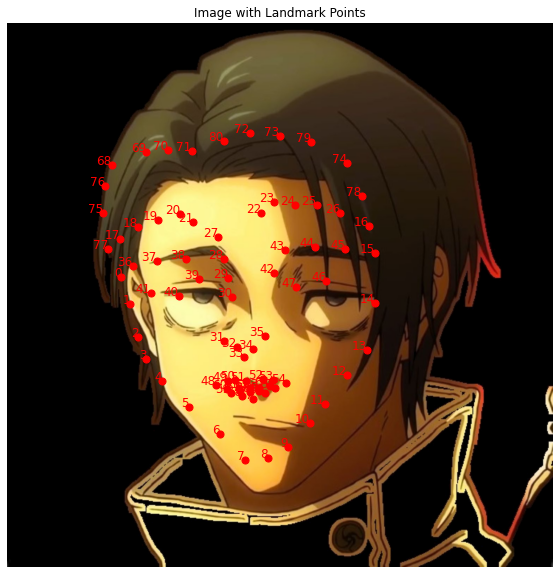

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

def plot_landmarks_on_image(image, landmarks_csv):
    # Load landmarks from CSV
    landmarks_df = pd.read_csv(landmarks_csv)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Plot each landmark point with its ID label
    for index, row in landmarks_df.iterrows():
        x, y = row['xxn'], row['yyn']
        plt.scatter(x, y, color='red', s=50)
        plt.text(x, y, str(index), color='red', fontsize=12, ha='right')
    
    plt.axis('off')
    plt.title('Image with Landmark Points')
    
    plt.show()


# Example usage:
image_path = '/kaggle/input/faceremove/yutafaceremove.png'  
landmarks_csv = '/kaggle/input/csvofchange/transformed_landmarks.csv' 

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_landmarks_on_image(image, landmarks_csv)

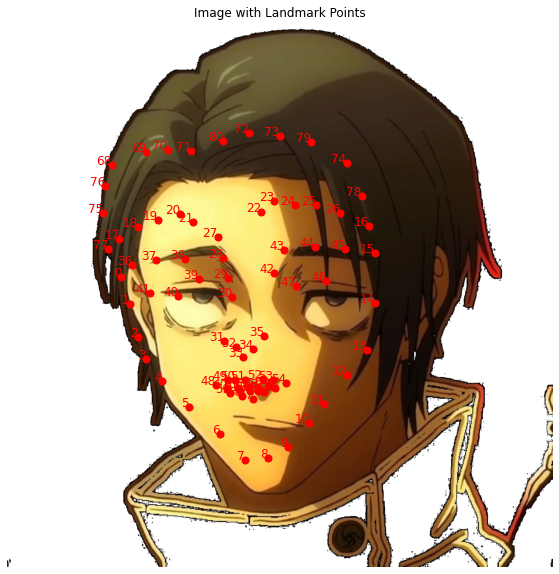

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2

def plot_landmarks_on_image(image, landmarks_csv):
    # Load landmarks from CSV
    landmarks_df = pd.read_csv(landmarks_csv)
    
    # Plot the image with alpha transparency
    plt.figure(figsize=(10, 10))
    plt.imshow(image, extent=[0, image.shape[1], image.shape[0], 0], alpha=1.0)
    
    # Plot each landmark point with its ID label
    for index, row in landmarks_df.iterrows():
        x, y = row['xxn'], row['yyn']
        plt.scatter(x, y, color='red', s=50)
        plt.text(x, y, str(index), color='red', fontsize=12, ha='right')
    
    plt.axis('off')
    plt.title('Image with Landmark Points')
    
    plt.show()


# Example usage:
image_path = '/kaggle/input/faceremove/yutafaceremove.png'  
landmarks_csv = '/kaggle/input/csvofchange/transformed_landmarks.csv' 

# Load the image
image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)  # Load the image with alpha channel
image = cv2.cvtColor(image, cv2.COLOR_BGRA2RGBA)      # Convert BGR to RGBA

plot_landmarks_on_image(image, landmarks_csv)

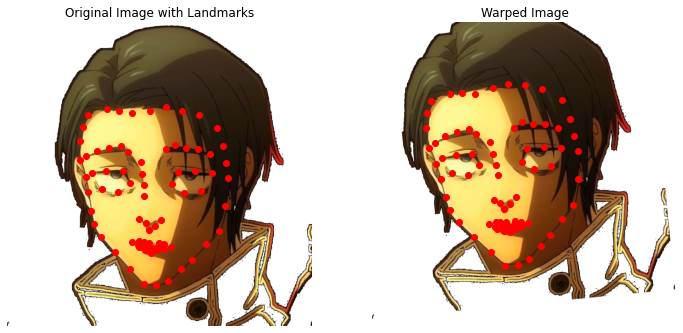

In [3]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# # Load the image
# image_path = '/kaggle/input/seechange/yuta.jpg'  # Path to your image
# image = np.array(Image.open(image_path))

# Load the landmarks data
updated_landmarks_csv = '/kaggle/input/updated/updated_landmarks.csv'
transformed_landmarks_csv = '/kaggle/input/csvofchange/transformed_landmarks.csv'
landmarks1_df = pd.read_csv(updated_landmarks_csv)
landmarks2_df = pd.read_csv(transformed_landmarks_csv)

# Extract landmark coordinates
original_landmarks = landmarks1_df[['xx', 'yy']].values
new_landmarks = landmarks2_df[['xxn', 'yyn']].values

# Estimate the affine transformation matrix
affine_result = cv2.estimateAffinePartial2D(original_landmarks, new_landmarks)
if affine_result is None:
    print("Error: Affine transformation estimation failed.")
else:
    affine_matrix = affine_result[0]

    # Apply the affine transformation to warp the original image
    warped_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

    # Visualize the original image and the warped image
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(image)
    axs[0].scatter(original_landmarks[:, 0], original_landmarks[:, 1], c='r', marker='o', label='Original Landmarks')
    axs[0].set_title('Original Image with Landmarks')
    axs[0].axis('off')

    axs[1].imshow(warped_image)
    axs[1].scatter(new_landmarks[:, 0], new_landmarks[:, 1], c='r', marker='o', label='Transformed Landmarks')
    axs[1].set_title('Warped Image')
    axs[1].axis('off')

    plt.show()

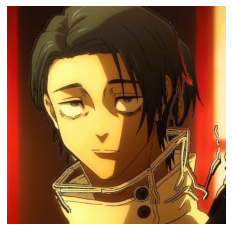

In [4]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/kaggle/input/seechange/yuta.jpg'  # Path to your image
image = np.array(Image.open(image_path))

mask = np.all(warped_image == 0, axis=2)

# Inverse the mask
inverse_mask = ~mask

# Ensure warped_image has an alpha channel
if image.shape[2] == 3:  # If image doesn't have alpha channel
    image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

# Convert inverse_mask to the same shape as warped_image
inverse_mask = np.repeat(inverse_mask[:, :, np.newaxis], 4, axis=2)

# Blend the warped image onto the original image using the inverse mask
blended_image = image.copy()
blended_image[inverse_mask] = warped_image[inverse_mask]

# Visualize the blended image
plt.imshow(blended_image)
plt.axis('off')
plt.show()

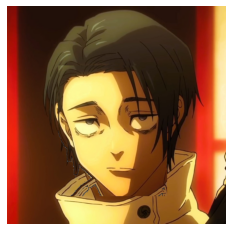

In [5]:
margin = 10  # can adjust

# Calculate the bounding box of the landmarks for the original image
x_orig, y_orig, w_orig, h_orig = cv2.boundingRect(original_landmarks.astype(np.int32))

# Expand the bounding rectangle by the margin
x_orig -= margin
y_orig -= margin
w_orig += 2 * margin
h_orig += 2 * margin

# Find the bounding box of the landmarks for the warped image
x_warped, y_warped, w_warped, h_warped = cv2.boundingRect(new_landmarks.astype(np.int32))

# Expand the bounding rectangle by the margin
x_warped -= margin
y_warped -= margin
w_warped += 2 * margin
h_warped += 2 * margin

# Resize the bounding box of the warped image to match the size of the original bounding box
scale_x = w_orig / w_warped
scale_y = h_orig / h_warped
x_warped_resized = int(x_warped * scale_x)
y_warped_resized = int(y_warped * scale_y)
w_warped_resized = int(w_warped * scale_x)
h_warped_resized = int(h_warped * scale_y)

# Crop the images to the original bounding box
image_cropped = image[y_orig:y_orig+h_orig, x_orig:x_orig+w_orig]
warped_image_cropped = warped_image[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]

# Ensure warped_image has an alpha channel
if image.shape[2] == 3:  # If image doesn't have alpha channel
    image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

# Create a copy of the image to work with
blended_image = image_cropped.copy()

# Apply the inverse mask to the warped image and blend it onto the original image
blended_image[inverse_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]] = \
    warped_image_cropped[inverse_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]]

# Paste the blended image back onto the original image
image[y_orig:y_orig+h_orig, x_orig:x_orig+w_orig] = blended_image

# Visualize the final image
plt.imshow(image)
plt.axis('off')
plt.show()

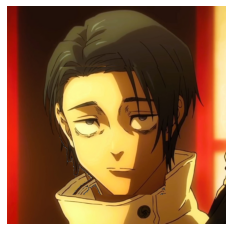

In [4]:
# Calculate the bounding box of the landmarks for the original image
x_orig, y_orig, w_orig, h_orig = cv2.boundingRect(original_landmarks.astype(np.int32))

# Find the bounding box of the landmarks for the warped image
x_warped, y_warped, w_warped, h_warped = cv2.boundingRect(new_landmarks.astype(np.int32))

# Resize the bounding box of the warped image to match the size of the original bounding box
scale_x = w_orig / w_warped
scale_y = h_orig / h_warped
x_warped_resized = int(x_warped * scale_x)
y_warped_resized = int(y_warped * scale_y)
w_warped_resized = int(w_warped * scale_x)
h_warped_resized = int(h_warped * scale_y)

# Crop the images to the original bounding box
image_cropped = image[y_orig:y_orig+h_orig, x_orig:x_orig+w_orig]
warped_image_cropped = warped_image[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]

# Ensure warped_image has an alpha channel
if image.shape[2] == 3:  # If image doesn't have alpha channel
    image = cv2.cvtColor(image, cv2.COLOR_RGB2RGBA)

# Create a copy of the image to work with
blended_image = image_cropped.copy()

# Apply the inverse mask to the warped image and blend it onto the original image
blended_image[inverse_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]] = \
    warped_image_cropped[inverse_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]]

# Paste the blended image back onto the original image
image[y_orig:y_orig+h_orig, x_orig:x_orig+w_orig] = blended_image

# Visualize the final image
plt.imshow(image)
plt.axis('off')
plt.show()

In [56]:
# Directory containing the CSV files
directory = '/kaggle/working/'

# Substring to search for in file names
substring_to_replace = '.jpg.csv'
new_substring = '.csv'

# Iterate over all files in the directory
for filename in os.listdir(directory):
    # Check if the filename contains the substring
    if substring_to_replace in filename:
        # Construct the new filename with the substring replaced
        new_filename = filename.replace(substring_to_replace, new_substring)
        
        # Rename the file
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))

In [61]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import os

# Load the image
image_path = '/kaggle/input/seechange/yuta.jpg'  # Path to your image
image = np.array(Image.open(image_path))

# Get all CSV filenames in the working directory starting with 'transformed_landmarks_frames_frame'
working_dir = '/kaggle/working/'
csv_filenames = [filename for filename in os.listdir(working_dir) if filename.startswith('t_')]
csv_filenames.sort()

# Iterate over CSV files
for idx, csv_filename in enumerate(csv_filenames):
    # Load the landmarks data
    with open(os.path.join(working_dir, csv_filename), 'rb') as file:
        print(chardet.detect(file.read()))

    # Extract landmark coordinates
    original_landmarks = landmarks_df[['xx', 'yy']].values
    new_landmarks = landmarks_df[['xxn', 'yyn']].values

    # Estimate the affine transformation matrix
    affine_result = cv2.estimateAffinePartial2D(original_landmarks, new_landmarks)
    if affine_result is None:
        print(f"Error: Affine transformation estimation failed for {csv_filename}.")
    else:
        affine_matrix = affine_result[0]

        # Apply the affine transformation to warp the original image
        warped_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

        # Create a mask for the black regions in the warped image
        mask = np.all(warped_image == 0, axis=2)

        # Invert the mask to select the non-black regions
        inv_mask = ~mask

        # Dilate the inverted mask to include neighboring pixels
        dilated_mask = cv2.dilate(inv_mask.astype(np.uint8), np.ones((30, 30), np.uint8))

        # Find the bounding box of the landmarks for the original image
        x_orig, y_orig, w_orig, h_orig = cv2.boundingRect(original_landmarks.astype(np.int32))

        # Find the bounding box of the landmarks for the warped image
        x_warped, y_warped, w_warped, h_warped = cv2.boundingRect(new_landmarks.astype(np.int32))

        # Resize the bounding box of the warped image to match the size of the original bounding box
        scale_x = w_orig / w_warped
        scale_y = h_orig / h_warped
        x_warped_resized = int(x_warped * scale_x)
        y_warped_resized = int(y_warped * scale_y)
        w_warped_resized = int(w_warped * scale_x)
        h_warped_resized = int(h_warped * scale_y)

        # Crop the images to the original bounding box
        image_cropped = image[y_orig:y_orig+h_orig, x_orig:x_orig+w_orig]
        warped_image_cropped = warped_image[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]

        # Create a mask for the pixels outside the landmark boundary
        outside_mask = np.zeros_like(warped_image_cropped)
        outside_mask[dilated_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]] = \
            warped_image_cropped[dilated_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig]]

        # Stretch the warped image based on the pixels outside the landmark boundary
        stretched_image = cv2.seamlessClone(outside_mask, warped_image_cropped, dilated_mask[y_warped_resized:y_warped_resized+h_orig, x_warped_resized:x_warped_resized+w_orig].astype(np.uint8), (w_orig//2, h_orig//2), cv2.NORMAL_CLONE)

        # Create the final image by pasting the stretched region onto the original image
        final_image = image_cropped.copy()
        final_image[:, :] = stretched_image

        # Paste the final image back onto the original image
        image[y_orig:y_orig+h_orig, x_orig:x_orig+w_orig] = final_image

        processed_image_save_path = os.path.join(working_dir, f'{idx+1:04d}.jpg')  # Format with leading zeros
        cv2.imwrite(processed_image_save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
        print(f"Processed image saved as {processed_image_save_path}")

    # Update the image for the next iteration
    image = np.array(Image.open(processed_image_save_path))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Processed image saved as /kaggle/working/0001.jpg
{'encoding': None, 'confidence': 0.0, 'language': None}
Processed image saved as /kaggle/working/0002.jpg
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Processed image saved as /kaggle/working/0003.jpg
{'encoding': None, 'confidence': 0.0, 'language': None}
Processed image saved as /kaggle/working/0004.jpg
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Processed image saved as /kaggle/working/0005.jpg
{'encoding': None, 'confidence': 0.0, 'language': None}
Processed image saved as /kaggle/working/0006.jpg
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Processed image saved as /kaggle/working/0007.jpg
{'encoding': None, 'confidence': 0.0, 'language': None}
Processed image saved as /kaggle/working/0008.jpg
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
Processed image saved as /kaggle/working/0009.jpg
{'encoding': None, 'confidence': 0.0, 'la

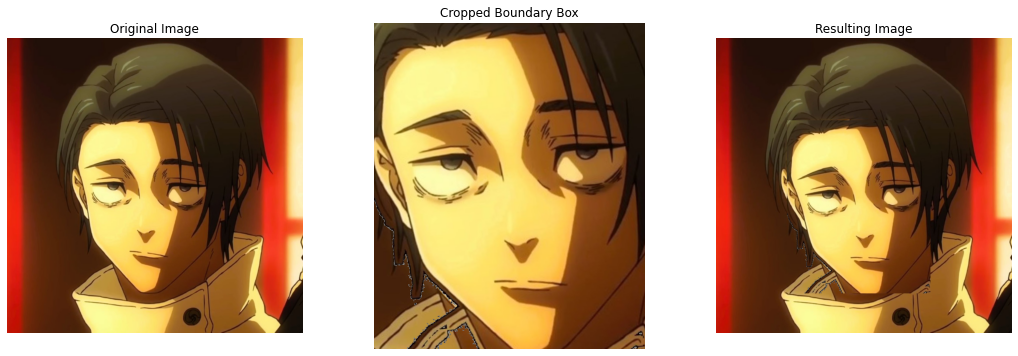

In [20]:
# Plot the original and resulting images side by side
# Load the image
image_path = '/kaggle/input/seechange/yuta.jpg'  # Path to your image
image1 = np.array(Image.open(image_path))
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image1)
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(image_cropped)
axes[1].set_title('Cropped Boundary Box')
axes[1].axis('off')
axes[2].imshow(image)
axes[2].set_title('Resulting Image')
axes[2].axis('off')
plt.show()

In [60]:
import chardet

In [6]:
plt.imsave('/kaggle/working/frame1yuta.png', image)

# Show the confirmation message
print("Image 'frame1yuta.png' saved successfully.")

Image 'frame1yuta.png' saved successfully.
